<h1>Assignment 1 : Analyse en composantes principales</h1>

Auteur : Nicolas Papadakis, 2022


# 1. Introduction 

## Objectif

Dans ce TP, nous allons utiliser l'Analyse en Composantes Principales (ACP)  sur un jeu de données, 
afin de mettre en évidence le principe, l'intérêt (réduction de dimension) et les limitations (interprétation de la visualisation) de cette méthode.

## Le jeu de données d'empreinte écologique

Ce jeu de données, produit par l'organisme à but non lucratif "Global Footprint Network" fournit depuis 2003 des informations sur l'empreinte écologique des pays, et calcule notamment chaque année le [Jour de dépassement](https://fr.wikipedia.org/wiki/Global_Footprint_Network#Le_Jour_de_d%C3%A9passement), où l'humanité a épuisé les ressources naturelles de la Terre pour l'année en cours.
Les données renseignent sur l'empreinte écologique  de la production, de la consommation et de la biocapacité (capacité à fournir des ressources renouvellables) de chaque pays par rapport aux composantes suivantes :
- les terres cultivées 
- les pâturages 
- les forêts 
- les zones de pêche 
- les terrains bâtis
- les émissions carbones.

Toutes ces composantes sont exprimées dans une même unité, l'[hectare global](https://fr.wikipedia.org/wiki/Biocapacit%C3%A9#Hectare_global), censée mesurer l'empreinte écologique.
Comme c'est toujours le cas, ces informations sont sujettes à des incertitudes liées à la collecte des données et aux hypothèses (par ex. qu'est ce qui est comptabilisé et ne l'est pas) faites par les auteurs et non présentées ici.

Nous nous intéressons dans ce TP uniquement aux données de consommation par pays sur l'année 2018. Les valeurs correspondantes de production (non fournies ici) sont inférieures, ce qui explique que chaque année, on consomme plus que ce que la Terre est capable de produire en une année.
Nous utiliserons également des données complémentaires fournies dans la base : le PIB par habitant ainsi que  l'[indice de développement humain](https://fr.wikipedia.org/wiki/Indice_de_d%C3%A9veloppement_humain).

### Lire le fichier de données
Pour lire les données, on peut utiliser le module `panda` qui permet de gérer des tableaux de données.

In [1]:
import pandas as pd
data = pd.read_csv("ecological_footprint_consommation.csv",encoding = 'ISO-8859-1', index_col=0)
data.head()

,Region,PIB/habitant (en millier de dollars),Indice de developpement humain,Terres cultivees,Paturages,Forets,Zones de peches,Terrains batis,Carbone
Pays,,,,,,,,,
Afghanistan,Middle East/Central Asia,0.56,0.509,0.3,0.2,0.1,0.0,0.0,0.2
Albania,Other Europe,5.05,0.792,0.5,0.2,0.2,0.0,0.0,0.9
Algeria,Africa,4.76,0.746,0.6,0.2,0.2,0.0,0.0,1.3
Angola,Africa,3.23,0.582,0.3,0.1,0.1,0.1,0.0,0.2
Argentina,South America,10.08,0.842,0.9,0.7,0.3,0.1,0.1,1.2


 Dans ce qui suit, on récupère le tableau des données qualitatives dans la matrice $X$ et la variable qualitative dans un vecteur "region". Quelques exemples d'affichage du contenu des données sont également fournis.

In [16]:
#Import des autres modules utiles
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n=data.shape[0]
print('Nombre d\'individus (pays) :', n)

## La première variable contient la région du globe.
## Récupérer la donnée qualitative (la région du globe)
region=data.loc[:,data.columns[0]].to_list()


## Récupérer le tableau des données quantitatives

#considérer les données de la colonne start_col à la dernière colonne
start_col=1 #doit être entre 1  (la colonne 0 est celle de la région) et data.shape[1]

p=data.shape[1]-start_col
print('La dimension des données est : ', p)

X=data.loc[:, data.columns[start_col]:data.columns[start_col+p-1]].to_numpy().reshape([n,p])
print('Taille du tableau des données :', X.shape,'\n')
print(X.shape)


#Exemples
print('L\'individu \"', data.index[4],'\" a pour valeur de région :',region[4],'\n')
print('L\'individu \"', data.index[4],'\" a pour variables :\n', X[4,:],'\n')

print('Les valeurs de la variable \"',  data.columns[3] , '\" pour l\'ensemble des individus sont:\n', X[:,2])
#décalage d'index ci dessus, car la première colonne a été mise dans région


Nombre d'individus (pays) : 149
La dimension des données est :  8
Taille du tableau des données : (149, 8) 

(149, 8)
L'individu " Argentina " a pour valeur de région : South America 

L'individu " Argentina " a pour variables :
 [10.08   0.842  0.9    0.7    0.3    0.1    0.1    1.2  ] 

Les valeurs de la variable " Terres cultivees " pour l'ensemble des individus sont:
 [0.3 0.5 0.6 0.3 0.9 0.5 0.8 0.6 0.6 0.6 0.4 0.6 0.7 1.1 0.5 0.8 0.5 0.5
 0.9 0.3 0.6 0.5 0.7 0.5 0.4 0.6 0.9 0.3 0.4 0.6 0.6 0.4 0.3 0.2 0.4 0.6
 0.6 0.7 0.7 0.4 0.4 0.2 0.3 0.4 0.4 0.7 0.5 0.5 0.4 0.7 0.6 0.7 0.4 0.6
 0.6 0.9 0.3 0.7 0.3 0.5 0.6 0.4 0.9 0.7 0.8 0.4 0.4 0.4 0.9 0.3 0.7 0.7
 0.4 0.7 0.8 0.6 0.3 0.3 0.7 0.8 0.8 0.2 0.5 0.7 0.7 0.5 0.5 0.3 0.6 0.7
 0.3 0.8 0.3 0.5 1.  0.3 0.8 0.5 0.8 0.5 0.3 0.4 0.3 0.7 0.5 0.4 0.6 0.8
 0.5 0.7 1.  0.6 0.3 0.5 0.6 0.6 0.8 0.5 0.6 0.6 0.6 0.4 0.3 1.1 0.4 0.5
 0.3 0.7 0.6 0.4 0.4 0.4 0.3 0.4 0.4 0.6 0.8 0.4 0.2 0.6 0.9 0.7 0.9 0.1
 0.4 0.5 0.2 0.2 0.2]


## Objectif  
Dans ce qui suit, nous allons utiliser l'ACP pour essayer de déterminer des similarités ou des différences entre les empreintes écologiques des différents pays.

## L'ACP
L'ACP consiste à projeter des données dans un espace décorrélé, pour 2 objectifs:
- Réduire la dimension des données, en résumant de manière optimale l'information à partir des composantes les plus significatives
- Visualiser des données de grande dimension (ici $p=8$) sur un plan $2D$ afin, potentiellement, de mieux les comprendre

# 2. ACP non normalisée : 

Soit $X=\{x_i^j\}$ le tableau des données contenant $i=1\cdots n$ individus et $j=1\cdots p$ variables

L'ACP non normalisée consiste à :
- Centrer les données : $\bar x_i^j= x_i^j-\mu^j$, où $\mu^j=\frac1n\sum_{i=1}^nx_i^j$
- Calculer $\Sigma$, la matrice de covariance des données :
 $$\Sigma =\frac1n \bar X^T\bar X=\begin{pmatrix}\sigma_1^2 & \text{Cov}(\bar x^1,\bar x^2)&\cdots&\text{Cov}(\bar x^1,\bar x^p)\\
				 \text{Cov}(\bar x^1,\bar x^2)&\ddots & & \vdots\\
				 \vdots & &\ddots &\vdots\\
				 \text{Cov}(\bar x^1,\bar x^p)&\cdots&\cdots &\sigma_p^2
\end{pmatrix}$$
où $\text{Cov}(\bar x^j,\bar x^{j'})=\frac1n\sum_{i=1}^n\bar x^j_i \bar x_i^{j'}$ et $\sigma_j^2=\text{Cov}(\bar x^j,\bar x^{j})$
- Réaliser la décomposition de $\Sigma$ en vecteur propre / valeurs propres : $\Sigma=V^T \Lambda V$, où $V$ est la matrice contenant les vecteurs propres et $\Lambda$ est une matrice diagonale contenant les $p$ valeurs propres $\{\lambda_j\}$. 
- Calculer les coordonnées projetées est: $\bar S=\bar XV$, où $s_i^j$ est la coordonée projetée de l'individu $i$ sur la composante principale $j$

L'inertie relative d'une composante principale $j$ est $I_j=\frac{\lambda_j}{\sum_{k=1}^p\lambda_k}$.
L'inertie peut être utilisée pour réduire la dimension des données, en ne conservant que les composantes significatives (ayant une proportion d'inertie importante).

## <span style="color:red"> Questions  (9 points)</span>
Réaliser une ACP non normalisée:
- Centrer les données pour obtenir $\bar X$ (1pt)
- Calculer $\Sigma$, la matrice de variance-covariance des données centrées $\bar X$ (1pt)
- Calculer les vecteurs propres et valeurs propres de cette matrice, en utilisant la fonction `np.linalg.eig` (1pts)
***Attention :*** *Les valeurs et vecteurs propres propres fournis par `np.linalg.eig` ne sont pas nécessairement ordonnées, et il faut veiller à bien projeter sur les vecteurs propres correspondants aux 2 valeurs propres les plus grandes.*
- Calculer la proportion d'inertie relative de l'ensemble des composantes principales (1pt)
- Calculer les coordonnées projetées des individus sur les composantes principales (1pts)
- Tracer sur un plan 2D (par exemple avec `plt.scatter`) le nuage des individus sur les 2 axes principaux, en utilisant la même échelle pour l'affichage des $2$ axes (par exemple avec `plt.axis('equal')`) . Afficher à côté de quelques points le nom du pays correspondant (par exemple avec `plt.annotate`). Les coordonnées de chaque pays sont celles correspondantes aux 2 premières composantes principales, celles qui ont la plus forte proportion d'inertie. (2pts)
- Qu'observez-vous ? Pourquoi ? (2pts)

0.9982917979894765
1.0


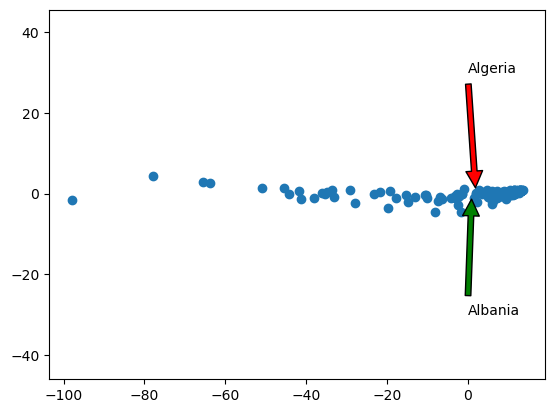

Text(0, -4, 'Albania')

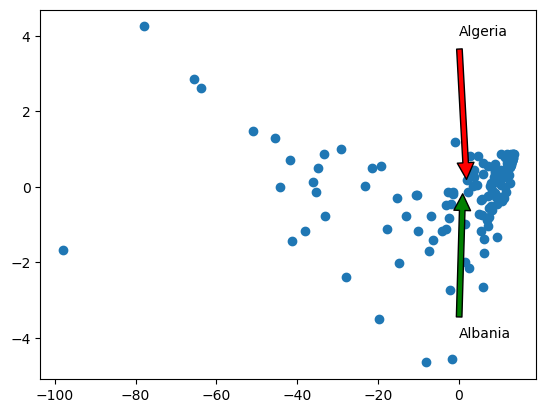

In [137]:
#ACP non normalisée :

#Centrer les données (1pt)

s1=np.zeros([1,p]) 
for k in  range(p):
    for i in range(n):
        s1[0][k]=s1[0][k]+X[i,k]

        
U=np.zeros([n,p])
for i in  range(n):
    for j in  range(p): 
            U[i,j] =X[i,j]-(1/n)*s1[0][j]

# U représente X barre
            
            
            
            
            
#Matrice de variance-covaraiance (1pt)

C=np.dot((1/n),np.dot(U.T,U))
#print(C.shape)
#print(C)






#Vecteurs propres et valeurs propres (1pt)

C_val_p =np.linalg.eig(C)[0]
#print(C_val_p)

C_vec_p = [] #liste des vecteurs propres de C
for i in range(p):
    vec_i = np.zeros([p,1])
    for j in range(p):
        vec_i[j][0] = np.linalg.eig(C)[1][j][i]
    C_vec_p.append(vec_i)
    
C_vec_p2=np.linalg.eig(C)[1] #liste des vecteurs propres de C

#C_vec_p permet de récuperer un vecteur propre precis et C_vec_p2
#permet de faire des calculs avec la matrice contenant les vecteurs
#propres






#Exercice supplémentaire: ordre des valeurs propres ?
    
Ordre_C_val_p=[]
C_val_p_modif=np.linalg.eig(C)[0]
r = 0
for k in range(p):
    m=max(C_val_p_modif[r:])
    #debut calcul indice max[r:]
    j = 0
    i=-1
    while j < p and i == -1:
        if C_val_p[j]==m:
            i=j
        j+=1
        #fin indice max[r:]
    Ordre_C_val_p.append(i)
    C_val_p_modif[r],C_val_p_modif[i]=C_val_p_modif[i],C_val_p_modif[r]
    r += 1
#print(Ordre_C_val_p)
    
#Dans notre cas ici les valeurs propres étaient déjà par 
#ordre décroissant
    
    
    
    
    
#Inertie (1pt)

s_val_p=0 #somme des valeurs propres
for i in C_val_p:
    s_val_p=s_val_p+i

I=np.zeros(p) #tableau des inerties relatives
for i in range(p):
    I[i]=C_val_p[i]/s_val_p
    
I_tot = 0
for i in I:
    I_tot=I_tot+i
    
I_prop=np.zeros(p)
for i in range(p):
    I_prop[i]=I[i]/I_tot
print(I_prop[0]+I_prop[1])

I_prop_tot = 0
for i in I:
    I_prop_tot=I_prop_tot+i
print(I_prop_tot)

#On remarque bien que la somme des proportions représente 100% 
#des données





#Cordonnées projetées (1pt)

D_C_val_p = np.diag(C_val_p)

C2=np.dot(C_vec_p2,np.dot(D_C_val_p,C_vec_p2.T)) 
#Attention petit problème avec la formule car V et V.T sont inversées

#On obtient bien C=C2

S = np.dot(U,C_vec_p2)



S2 = [] #liste des vecteurs propres de C
for i in range(p):
    S_i = np.zeros([n,1])
    for j in range(n):
        S_i[j][0] = S[j][i]
    S2.append(S_i)
#S2 est une liste des colones de S




#Nuage des individus (2pts)

plt.scatter(S2[0],S2[1],)
plt.axis('equal')
plt.annotate('Algeria',xy=(2,0),xytext=(0,30),arrowprops=dict(facecolor='red',shrink=0.05))
plt.annotate('Albania',xy=(1,0),xytext=(0,-30),arrowprops=dict(facecolor='green',shrink=0.05))
plt.show()

plt.scatter(S2[0],S2[1],)
plt.annotate('Algeria',xy=(2,0),xytext=(0,4),arrowprops=dict(facecolor='red',shrink=0.05))
plt.annotate('Albania',xy=(1,0),xytext=(0,-4),arrowprops=dict(facecolor='green',shrink=0.05))


Ecrire ici vos obervations (2pts)

On observe que les differents points sont écartés principalement sur l'axe des x (ce qui est logique comme cela correspond à la proportion d'inertie la plus grande).

Les deux proportions d'inertie les plus grandes représentent 99,8% des données (I_prop(0)+I_prop(1))

De plus la plupart des résultats sont proches du point (0,0).

En ne gardant que les résultats compris sur l'intervalle (-5,5) sur l'axe des ordonnées on peut avoir une bien meilleur vision du graphique. (Cf deuxième graphique)


# 3. ACP normalisée

Soit $X=\{x_i^j\}$ le tableau des données contenant $i=1\cdots n$ individus et $j=1\cdots p$ variables

L'ACP normalisée consite à :
- Standardiser les données : $\tilde x_i^j= (x_i^j-\mu^j)/\sigma^j$, où $\mu^j=\frac1n\sum_{i=1}^nx_i^j$ et $\sigma^j=\sqrt{\frac1n\sum_{i=1}^n(x_i^j-\mu^j)^2}$
- Calculer $C$, la matrice de corrélation des données :
 $$C =\frac1n \tilde X^T\tilde X=\begin{pmatrix}1 & \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^2)}{\sigma_1\sigma_2}&\cdots& \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^p)}{\sigma_1\sigma_p}\\
				  \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^2)}{\sigma_1\sigma_2}&\ddots & & \vdots\\
				 \vdots & &\ddots &\vdots\\
				  \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^p)}{\sigma_1\sigma_p}&\cdots&\cdots &1
\end{pmatrix}$$
où  $\text{Cov}(\tilde x^j,\tilde x^{j'})=\frac1n\sum_{i=1}^n\tilde x^j_i \tilde x_i^{j'}$ et $\sigma_j^2=\text{Cov}(\tilde x^j,\tilde x^{j})$
- Réaliser la décomposition de $C$ en vecteur propre / valeurs propres : $C=V \Lambda V^T$, où $V$ est la matrice contenant les vecteurs propres et $\Lambda$ est une matrice diagonale contenant les $p$ valeurs propres $\{\lambda_j\}$. 
- Calculer les coordonnées projetées : $S=\tilde XV$, où $s_i^j$ est la coordonée projetée de l'individu $i$ sur la composante principale $j$

L'inertie relative d'une composante principale $j$ est 
$$I_j=\frac{\lambda_j}{\sum_{k=1}^p\lambda_k}$$

## <span style="color:red"> Questions  (4 points)</span>
**Réaliser une ACP normalisée :**
- Standardiser les données pour obtenir $\tilde X$ (1pt)
- Calculer la matrice $C$ de covariance des données standardisées $\tilde X$ (=matrice de corrélation des données $X$, les vecteurs propres et valeurs propres de cette matrice, puis les coordonnées projetées (0pt, c'est comme avant)

**Etude des résultats :**
- Calculer la proportion d'inertie de l'ensemble des composantes principales (0pt). Combien de composantes faut-il garder pour conserver $90\%$ de la variabilité des données ? (.5pt) Combien de proportion de l'inertie conservera-t-on lors d'un affichage en 2D ? (.5pt)
- Visualisation des coordonnées projetées. Utiliser le bout de code fourni qui trace sur un plan 2D le nuage des individus, avec une couleur de point qui dépend de la région du globe à laquelle appartient le pays. Comme avant, les coordonnées de chaque pays sont celles correspondantes aux 2 premières composantes principales, les 2 de plus forte inertie relative. Qu'observez-vous ? (Faire une analyse relative aux régions, vous pouvez afficher le nom des pays si cela vous aide dans votre analyse) (2pts)



[0.52009409 0.18900486 0.14716161 0.07460194 0.04234023 0.0200471
 0.00577199 0.00097817]
1.0


Text(0, 30, 'Afghanistan')

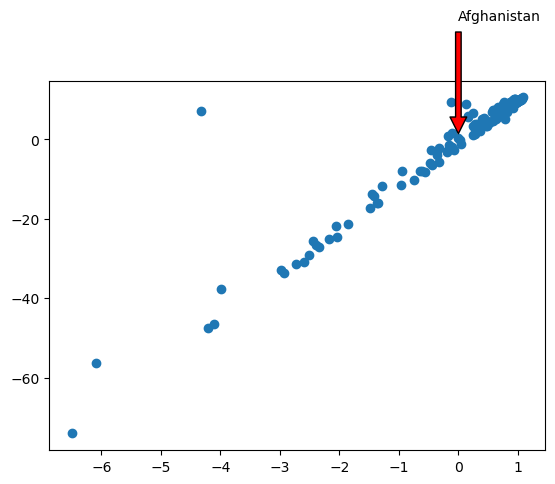

In [143]:
# ACP normalisée :

#Standardiser les données (1pt)


s1=np.zeros([1,p])     #s1 reste identique
for k in  range(p):
    for i in range(n):
        s1[0][k]=s1[0][k]+X[i,k]
       
    
w1=np.zeros([1,p]) 
for k in  range(p):
    for i in range(n):
        w1[0][k]=w1[0][k]+(X[i,k]-s1[0][k])**2
        
        
w2=np.zeros([1,p]) 
for k in  range(p):
    w2[0][k]=((1/n)*w1[0][k])**(1/2)

        
        
B=np.zeros([n,p])
for i in  range(n):
    for j in  range(p): 
            B[i,j] =(X[i,j]-(1/n)*s1[0][j])/w2[0][j]
        


C=np.dot((1/n),np.dot(B.T,B))









#Vecteurs propres et valeurs propres

C_val_p =np.linalg.eig(C)[0]

C_vec_p = [] #liste des vecteurs propres de C
for i in range(p):
    vec_i = np.zeros([p,1])
    for j in range(p):
        vec_i[j][0] = np.linalg.eig(C)[1][j][i]
    C_vec_p.append(vec_i)
    
C_vec_p2=np.linalg.eig(C)[1] #liste des vecteurs propres de C

#C_vec_p permet de récuperer un vecteur propre precis et C_vec_p2
#permet de faire des calculs avec la matrice contenant les vecteurs
#propres






#Inertie 

s_val_p=0 #somme des valeurs propres
for i in C_val_p:
    s_val_p=s_val_p+i

I=np.zeros(p) #tableau des inerties relatives
for i in range(p):
    I[i]=C_val_p[i]/s_val_p
    
I_tot = 0
for i in I:
    I_tot=I_tot+i
    
I_prop=np.zeros(p)
for i in range(p):
    I_prop[i]=I[i]/I_tot
print(I_prop)

I_prop_tot = 0
for i in I:
    I_prop_tot=I_prop_tot+i
print(I_prop_tot)

#On remarque bien que la somme des proportions représente 100% 
#des données



#Faire l'ACP

#Cordonnées projetées 

D_C_val_p = np.diag(C_val_p)

C2=np.dot(C_vec_p2,np.dot(D_C_val_p,C_vec_p2.T)) 
#Attention petit problème avec la formule car V et V.T sont inversées

#On obtient bien C=C2

S = np.dot(U,C_vec_p2)



S2 = [] #liste des vecteurs propres de C
for i in range(p):
    S_i = np.zeros([n,1])
    for j in range(n):
        S_i[j][0] = S[j][i]
    S2.append(S_i)
#S2 est une liste des colones de S




#Nuage des individus 

plt.scatter(S2[0],S2[1],)
plt.annotate('Afghanistan',xy=(0,0),xytext=(0,30),arrowprops=dict(facecolor='red',shrink=0.05))









ICI: Question sur l'intertie (1pt)

On remarque que les deux premières composantes ne représentent que 70% des données. On conservera donc 70% de proportion de l'inertie lors d'un affichage en 2D.

Il faut donc prendre en compte plus d'information si on veut garder une certaine precision.

Finalement, la somme des 4 premières composantes est supérieur à 90% (car 0.52009409+0.18900486+0.14716161+0.07460194 = 0.91 environ).

Il faut donc garder 4 composantes pour conserver 90% de la variabilité des données.

Les régions possibles sont :
 ['Middle East/Central Asia', 'Other Europe', 'Africa', 'South America', 'EU', 'Central America/Caribbean', 'Asia-Pacific', 'North America'] 



/tmp/ipykernel_2781/3311912788.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  index_region=np.array(np.ones([n, 1]),dtype=np.int)


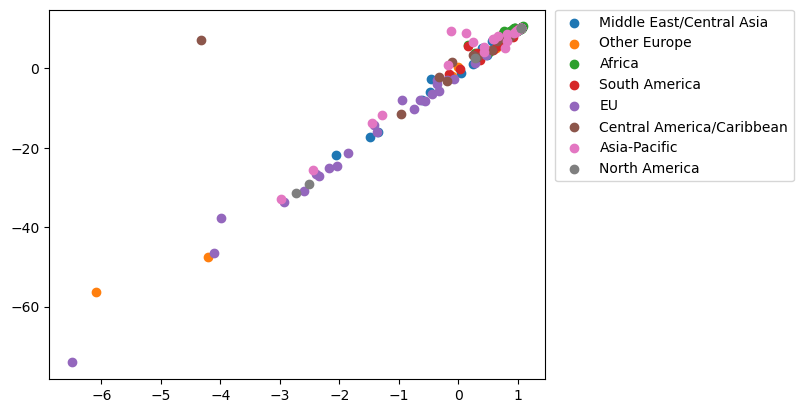

In [124]:
#Code d'affichage fourni
#necessite la matrice S des corddonées projetée, de taille (n x p)

#Récupérer la liste des régions différentes
labels_region=pd.unique(data['Region']).tolist()
print('Les régions possibles sont :\n',labels_region,'\n')

#Transformer la variable region en index pointant vers les labels
index_region=np.array(np.ones([n, 1]),dtype=np.int)
for i in range(n):
    index_region[i]=labels_region.index(region[i])
    
fig, ax = plt.subplots()
    
for i in range(len(labels_region)) :
    idx=np.where(index_region==i)        
    ax.scatter(S[idx,0],S[idx,1])

##Afficher le nom des pays, attention on verra plus rien 
#for i in range(n):
    #ax.annotate(data.index[i], (S[i,0], S[i,1]))    
    ax.legend(labels_region, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ICI : vos conclusions (2pts)

L'ensemble des pays (des points) forme un une droite affine de coefficient directeur proche de 10.

On remarque que la plupart des points qui consernent l'Asie sont proche du point de coordonnée (1,10).



## Etude des individus
Avant d'aller plus loindans l'analyse des variables, nous allons tout d'abord étudier les individus.
Nous allons notamment regarder si certains pays ont eu un impact important sur le calcul des composantes principales tout en ayant une mauvaise qualité de représentation.
- La qualité de représentation d'un pays $x_i$ par la composante $s^k$ est :
$$Q(i,k)=\frac{(s_i^k)^2}{\sum_{l=1}^p(s_i^l)^2}$$

- La contribution d'un individu $x_i$ au calcul de la composante $s^j$ est donné par :
$$ctr(i,k)=\frac{(s_i^k)^2}{\sum_{m=1}^n(s^k_m)^2}$$

Nous allons également examiner si le modèle a de bonnes capacités de généralisation, c'est à dire si il peut bien représenter des individus qui n'ont pas été utilisés lors du calcul de l'ACP. Nous considérons pour cela les données des $4$ pays suivants, dont les valeurs de variables (PIB, ..., carbone) sont : 

- Australie=[49.71, 0.921, 0.8, 0.3, 0.9, 0.1,0.1, 3.9]
- Ethiopie=[0.57, 0.478, 0.3, 0.1, 0.4, 0.0, 0.1, 0.1]
- France=[45.06, 0.898, 0.8, 0.2, 0.5, 0.2, 0.2, 2.5]
- Qatar=[63.99, 0.845, 0.7, 0.3, 0.2, 0.2, 0.0, 12.8]  

## <span style="color:red"> Questions  (8 points)</span>
**Etude des individus :**
- Calculer la contribution de chaque pays pour chacun des axes principaux (1pt)
- Afficher la liste des pays qui ont une contribution supérieure à 5% pour une ou l'autre des composantes principales. Afficher pour ces pays la valeur des contributions ainsi que la qualité de leur représentation (1pt)
- Que concluez-vous ? (1pt)

**Individus supplémentaires :**
- Calculer les coordonnées projetées $s_l$ des nouveaux pays fournis (Australie, Ethipie, Danemark et Qatar)  : $s_l=\tilde z_lV$, avec $z_l$ les variables originales du pays $l$, et $\tilde z_l^j=(z_l^j-\mu^j)/\sigma^j$, les variables standardisées avec les moyennes et variances précédentes de l'ACP et $V$ les vecteures propres de l'ACP (1pt)
- Calculer la qualité de la représentation de ces 4 pays sur les 2 composantes principales (1pt)
- Ajoutez ces pays sur le diagramme 2D de la question précédente (celui où la couleur d'un point correspond à sa région). Indiquer le nom de ces 4 pays à côté de leur points (1pt)
- Etudier la position de ces nouveaux pays par rapport à celles des autres pays de leurs régions. Que concluez-vous ? (2pts)

In [ ]:
# Contributions (1pt)

# Affichage (1pt)
  


In [ ]:
ICI : vos conclusions (1pt)

In [ ]:
#Nouveaux individus
Australie=[49.71, 0.921, 0.8, 0.3, 0.9, 0.1,0.1, 3.9]
Ethiopie=[0.57, 0.478, 0.3, 0.1, 0.4, 0.0, 0.1, 0.1]
France=[45.06, 0.898, 0.8, 0.2, 0.5, 0.2, 0.2, 2.5]
Qatar=[63.99, 0.845, 0.7, 0.3, 0.2, 0.2, 0.0, 12.8]          

#Coordonnées projetées des nouveaux individus (1pt)

#Qualité de représentation de ces individus (1pt)

#Affichage de ces individus (1pt)

In [ ]:
ICI : vos conclusions (2pts)

# Etude des variables

Nous allons à présent étudier la contribution et la qualité de représentations des variables (PIB,...)  relativement aux 2 composantes principales. On note $cor(x,s)=\frac1n \sum_{i=1}^nx_is_i/\sigma$ la corrélation entre $2$ variables $x$ et $s$ centrées de dimension $n$, avec $\sigma=\sqrt{\frac1n\sum_{i=1}^ns_i^2}$. 
- La qualité de représentation d'une variable standardisée $\tilde x^j$ par la composante $s^k$ est :
$$Q(j,k)=\frac{cor(\tilde x^j,s^k)^2}{\sum_{l=1}^p cor(\tilde x^j,s^l)^2}$$

- La contribution d'une variable $x^j$  à l'inertie de la composante $s^k$ est donné par :
$$ctr(j,k)=\frac{cor(\tilde x^j,s^k)^2}{\sum_{l=1}^p cor(\tilde x^l,s^k)^2}$$



## <span style="color:red"> Questions  (5 points)</span>
- Calculer la qualité de représentation de chaque variable par les deux premières composantes principales (1pt)
- Réprésenter les variables sur le cercle des corrélations (par exemple en utilisant `plt.quiver`) (1pt)
- Calculer et afficher la contribution de chaque variable aux 2 premières composantes principales (1pt)
- Que pouvez-vous en déduire (variables corrélées...) ? (2pts)

In [ ]:
#Qualité de représentation des variables (1pt)

#Affichage sur le cercle des corrélations (1pt)

#Contribution des variables (1pt)


In [ ]:
ICI : vos conclusions (2pts)

## <span style="color:red"> Questions bonus  (+4 points)</span>

- A partir de ces résultats, argumentez sur la sélection d'un sous ensemble des variables de X qui vous semblerait pertinent (2 pt)
- Réaliser depuis le début l'ACP normalisée sur ce sous ensemble de variables (0pt, normalement tout est déjà codé)
- Visualiser / Analyser les résultats (2pts)
